**1. Load and Inspect Data**




In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('/kaggle/input/ueba-dbscan-iforest/train_data.csv', encoding='latin1')

print("Train Data Shape:", train_data.shape)

print(train_data.head())


Train Data Shape: (528690, 10)
   id            account         group              IP  \
0   1  xiaojiawei@qq.com  ÈËÊÂÐÐÕþÖÐÐÄ    192.168.1.50   
1   2  xiaojiawei@qq.com  ÈËÊÂÐÐÕþÖÐÐÄ   192.168.31.46   
2   3  xiaojiawei@qq.com  ÈËÊÂÐÐÕþÖÐÐÄ     192.168.2.3   
3   4  xiaojiawei@qq.com  ÈËÊÂÐÐÕþÖÐÐÄ  192.168.145.30   
4   5  xiaojiawei@qq.com  ÈËÊÂÐÐÕþÖÐÐÄ  192.168.178.92   

                               url   port  vlan      switchIP            time  \
0                http://123.6.4.41  15788   700  129.30.06.37  2021/6/16 7:56   
1           http://104.192.108.154  12665   700  152.91.89.45  2021/6/28 7:58   
2              http://42.236.37.80  25551   700  129.30.06.37   2021/6/1 6:37   
3  http://uf-api6-client.ksord.com  18274   700    162.6.8.29   2021/5/5 8:18   
4           http://101.199.128.170  34572   700    162.0.1.84  2021/6/20 6:52   

      ret  
0  0.1149  
1  0.1801  
2  0.3690  
3  0.1532  
4  0.1449  


In [2]:
print("Total observations:", len(train_data))
print("Unique accounts:", train_data['account'].nunique())
print("Unique IPs:", train_data['IP'].nunique())
print("Unique URLs:", train_data['url'].nunique())
print("Unique switchIPs:", train_data['switchIP'].nunique())

Total observations: 528690
Unique accounts: 151
Unique IPs: 133
Unique URLs: 1319
Unique switchIPs: 133


In [3]:
# Convert 'time' column to datetime and sort by time
train_data['time'] = pd.to_datetime(train_data['time'],format='%Y/%m/%d %H:%M')
train_data = train_data.sort_values(by='time')


In [4]:
# Temporal range of the dataset
start_time = train_data['time'].min()
end_time = train_data['time'].max()


In [5]:
print(f"First observation: {start_time}\nLatest observation: {end_time}")
print("Total observations:", len(train_data))
print("Unique accounts:", train_data['account'].nunique())
print("Unique IPs:", train_data['IP'].nunique())
print("Unique URLs:", train_data['url'].nunique())
print("Unique switchIPs:", train_data['switchIP'].nunique())

First observation: 2021-04-30 18:05:00
Latest observation: 2021-06-29 15:58:00
Total observations: 528690
Unique accounts: 151
Unique IPs: 133
Unique URLs: 1319
Unique switchIPs: 133


**2. Filter Data to Select Specific Users**

In [6]:
# Select a subset of users
unique_users = train_data['account'].unique()
selected_users = np.random.choice(unique_users, 5, replace=False)
filtered_df = train_data[train_data['account'].isin(selected_users)]


In [7]:
print("Total observations:", len(filtered_df))
print("Unique accounts:", filtered_df['account'].nunique())
print("Unique IPs:", filtered_df['IP'].nunique())
print("Unique URLs:", filtered_df['url'].nunique())
print("Unique switchIPs:", filtered_df['switchIP'].nunique())


Total observations: 19728
Unique accounts: 5
Unique IPs: 119
Unique URLs: 985
Unique switchIPs: 121


**2.1 Filter Data to Select Specific Time Ranges**

In [8]:
# Define the time range
start_date = '2021-06-26'
end_date = '2021-06-29'

# Filter data within the time range
sample_df = filtered_df[filtered_df['time'].between(start_date, end_date)]
sample_df.set_index('time', inplace=True, drop=False)

In [9]:
print("Total observations:", len(sample_df))
print("Unique accounts:", sample_df['account'].nunique())
print("Unique IPs:", sample_df['IP'].nunique())
print("Unique URLs:", sample_df['url'].nunique())
print("Unique switchIPs:", sample_df['switchIP'].nunique())


Total observations: 1065
Unique accounts: 5
Unique IPs: 94
Unique URLs: 406
Unique switchIPs: 89


In [10]:
sample_df.columns

Index(['id', 'account', 'group', 'IP', 'url', 'port', 'vlan', 'switchIP',
       'time', 'ret'],
      dtype='object')

In [11]:
sample_df = sample_df.drop(columns=['id', 'group', 'port', 'vlan','ret', 'switchIP'])

In [12]:
sample_df.shape

(1065, 4)

In [13]:
# numerical_features = [feature for feature in filtered_df.columns if sample_df[feature].dtypes != 'O' and sample_df[feature].dtype in ['int64', 'float64']]
# discrete_features=[feature for feature in numerical_features if len(filtered_df[feature].unique())<15]
# continuous_feature=[feature for feature in numerical_features if feature not in discrete_features]


**Label Encoding for categorical variables**

In [14]:
categorical_features=[feature for feature in sample_df.columns if sample_df[feature].dtypes=='O']


In [15]:
categorical_features

['account', 'IP', 'url']

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for feature in categorical_features:
    sample_df[feature + '_encoded'] = le.fit_transform(sample_df[feature])
    

In [17]:
sample_df.head(3)

,account,IP,url,time,account_encoded,IP_encoded,url_encoded
time,,,,,,,
2021-06-26 00:47:00,wenlichao@qq.com,192.168.10.115,http://bj.dh978.com,2021-06-26 00:47:00,3,15,151
2021-06-26 01:27:00,wenlichao@qq.com,192.168.31.152,http://only-853333-154-16-166-210.nstool.netea...,2021-06-26 01:27:00,3,69,274
2021-06-26 01:45:00,wenlichao@qq.com,192.168.145.54,http://p15.qhimg.com,2021-06-26 01:45:00,3,28,282


In [18]:
# Drop the original categorical columns 
sample_df = sample_df.drop(columns=categorical_features)
sample_df.head(5)

,time,account_encoded,IP_encoded,url_encoded
time,,,,
2021-06-26 00:47:00,2021-06-26 00:47:00,3,15,151
2021-06-26 01:27:00,2021-06-26 01:27:00,3,69,274
2021-06-26 01:45:00,2021-06-26 01:45:00,3,28,282
2021-06-26 01:59:00,2021-06-26 01:59:00,3,6,89
2021-06-26 02:00:00,2021-06-26 02:00:00,3,46,200


In [19]:
# **Feature Hashing for categorical variables**

# from sklearn.feature_extraction import FeatureHasher

# cols = sample_df[["account", "IP", "url"]]

# # Convert each value in the selected columns to a string
# cols = cols.map(str)

# # Convert selected columns to list of dictionaries
# data_dict = cols.to_dict(orient='records')

# # Initialize feature hasher
# hasher = FeatureHasher(n_features=10, input_type='string')
# hashed_features = hasher.fit_transform(data_dict).toarray()

# # Convert hashed features to DataFrame
# hashed_df = pd.DataFrame(hashed_features, columns=[f'feature_{i}' for i in range(hashed_features.shape[1])])

# # Combine the original DataFrame with hashed features
# result_df = pd.concat([cols.reset_index(), hashed_df], axis=1)

### **Pre-processing of Time column**

In [20]:
# Extract numerical features

sample_df['hour'] = sample_df['time'].dt.hour
sample_df['day_of_week'] = sample_df['time'].dt.day_of_week
sample_df['month'] = sample_df['time'].dt.month


In [21]:
sample_df.drop('time', axis=1, inplace=True)

In [22]:
sample_df.head(4)

,account_encoded,IP_encoded,url_encoded,hour,day_of_week,month
time,,,,,,
2021-06-26 00:47:00,3,15,151,0,5,6
2021-06-26 01:27:00,3,69,274,1,5,6
2021-06-26 01:45:00,3,28,282,1,5,6
2021-06-26 01:59:00,3,6,89,1,5,6


**4. Preprocess (Normalize) the Data**

In [23]:
from sklearn.preprocessing import StandardScaler

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sample_df)


**DBSCAN algorithm**

In [24]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
epsilon = 0.5
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_data)

In [25]:
clusters

array([-1, -1, -1, ..., -1, -1, -1])

In [26]:
index = np.where(clusters<0)
index

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   29,   30,   33,   35,   36,
          37,   38,   39,   42,   43,   45,   46,   47,   48,   50,   51,
          53,   55,   60,   62,   67,   69,   72,   73,   76,   81,   88,
          89,   92,   96,  100,  104,  109,  116,  120,  122,  125,  129,
         136,  140,  143,  148,  158,  164,  166,  167,  168,  173,  183,
         185,  187,  204,  206,  207,  208,  215,  217,  220,  223,  224,
         228,  231,  233,  235,  236,  238,  239,  241,  242,  243,  244,
         245,  247,  248,  249,  250,  252,  253,  255,  256,  257,  258,
         259,  260,  261,  262,  264,  265,  266,  267,  269,  270,  271,
         272,  275,  276,  277,  278,  279,  282,  284,  286,  287,  288,
         289,  291,  292,  293,  294,  295,  296,  297,  298,  299,  301,
         302,  303,  304,  305,  307, 

#### Identify the core and the outliers


In [27]:
# Identify the core and the outliers
import numpy as np

core_samples = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

In [28]:
labels

array([-1, -1, -1, ..., -1, -1, -1])

In [29]:
# Check the number of clusters after DBSCAN algorithm (ignoring noise if present)

n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')


Estimated number of clusters: 32
Estimated number of noise points: 564


In [30]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso_forest = IsolationForest(contamination='auto', random_state=42)
iso_labels = iso_forest.fit_predict(scaled_data)


In [31]:
# Check the number of outliers after applying IForest algorithm (ignoring noise if present)

n_clusters_ = len(set(iso_labels)) - (1 if -1 in iso_labels else 0)
n_noise_ = list(iso_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')


Estimated number of clusters: 1
Estimated number of noise points: 592


**7. Evaluate and Visualize Results**

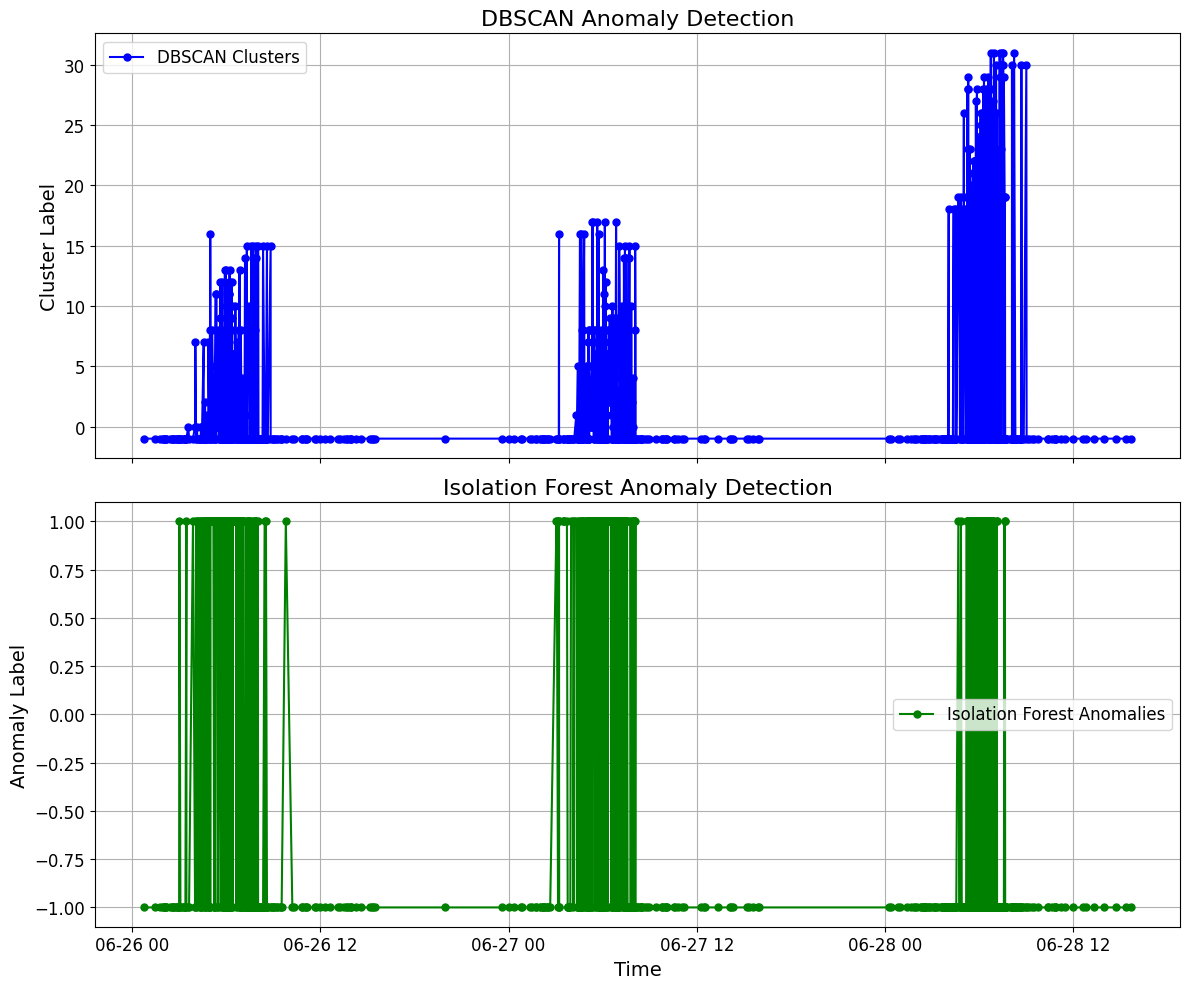

In [32]:
import matplotlib.pyplot as plt

# Create a figure with subplots and a specified size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot DBSCAN labels
ax1.plot(sample_df.index, clusters, marker='o', linestyle='-', color='b', markersize=5, label='DBSCAN Clusters')
ax1.set_title('DBSCAN Anomaly Detection', fontsize=16)
ax1.set_ylabel('Cluster Label', fontsize=14)
ax1.grid(True)
ax1.legend(fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Plot Isolation Forest labels
ax2.plot(sample_df.index, iso_labels, marker='o', linestyle='-', color='g', markersize=5, label='Isolation Forest Anomalies')
ax2.set_title('Isolation Forest Anomaly Detection', fontsize=16)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Anomaly Label', fontsize=14)
ax2.grid(True)
ax2.legend(fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [33]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Coefficient
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Coefficient: {silhouette_avg}")

Silhouette Coefficient: -0.1452822355715879


In [34]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Coefficient
silhouette_isolation_f = silhouette_score(scaled_data, iso_labels)
print(f"Silhouette Coefficient: {silhouette_isolation_f}")

Silhouette Coefficient: 0.030559278777448465
